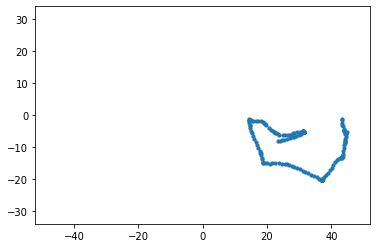

'Razi2018'

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Team import Team
from Event import Event
from Player import Player
from Position import Position

class DataCollector():
	def __init__(self): #sem log_path
		
		self.__log_path = './t1.rcg.csv'
		self.__data_frame = None	

		self.__team_l = None # By instanciating the team, all the computing is scored inside the __init__ of the class Team()
		self.__team_r = None
		self.__teams = []
		self.__all_events = []
		self.__all_faults = []
		self.__all_goals = []
		self.__all_penalties = []

		# calls for data computing
		self.initialize()

	
	# Creates the Setters and Getters methods   

	def set_team_l(self, team):
		self.__team_l = team
    
	def set_log_path(self,log_path):
		self.__log_path = log_path 		

	def set_all_goals(self, all_goals):
		self.__all_goals = all_goals

	def set_all_faults(self, all_faults):
		self.__all_faults =	all_faults

	def set_all_penalties(self, all_penalties):
		self.__all_penalties = all_penalties
	
	# Getters
	
	def get_team(self, team_side):
		
		if(team_side == "l"):
			return self.__team_l
		else:
			return self.__team_r
    
	def get_team_name(self, team_side):
		if(team_side == "l"):
			return self.__team_l.get_name()
		else:
			return self.__team_r.get_name()
        

	
	# Does the general initialization
	def initialize(self):
		
		# The data will be collected from this dataframe
		self.__data_frame = pd.read_csv(self.__log_path)

        # Getting teams names from the Data Frame
		team_left_name = self.__data_frame.iloc[0].team_name_l
		team_right_name = self.__data_frame.iloc[0].team_name_r
        
        # Players are initialized before the Teams because they are an attribute of them.
        # -> All Teams have an array of Players
        
        # Players
		left_players = self.starting_players(team_left_name, "l")
		right_players = self.starting_players(team_right_name, "r")
        
		# Teams:
		self.starting_teams(team_left_name, team_right_name, left_players, right_players)

        # Saving both teams in this DataCollector
		self.__teams.append(self.__team_l)
		self.__teams.append(self.__team_r)


		# Corners:
		#
		#	code here

		# Ball out:
		#
		#	code here

		# parse the __all_goals list, giving, for each goal, it's reference to the team and player that scored it

	# Definition of computing functions

	def teste(self):
			rowData = self.__data_frame.loc[100,'playmode']
			print(rowData)
            
	def find_unique_event_occurrences(self, event):
  		
		event_occurrences_index = []
  		
		for i in range(len(self.__data_frame)):
			if(self.__data_frame.iloc[i,1] == event and self.__data_frame.iloc[i-1,1] != event):
				event_occurrences_index.append(i+2) # +2 because the log starts at 1 and it gets the previous line
		
		return event_occurrences_index

	def player_replay(self, n, player_n, side):
		
		if side[0] == 'l' or side[0] == 'L':
			side = 'l'
		elif side[0] == 'r' or side[0] == 'R':
			side = 'r'
		
		goal_occurrences_l = self.find_unique_event_occurrences("goal_l")
		goal_occurrences_r = self.find_unique_event_occurrences("goal_r")
		
		end_time = goal_occurrences_l[0]
		start_time = goal_occurrences_l[0] - n
		
		player_row_x = "player_{}{}_x".format(side,player_n)
		player_row_y = "player_{}{}_y".format(side,player_n)
		
		player_replay_x = []
		player_replay_y = []
		
		for i in range(0, n):
			player_replay_x.append(self.__data_frame.loc[start_time + i,player_row_x])
			player_replay_y.append(self.__data_frame.loc[start_time + i,player_row_y])
		
		plt.xlim(-52, 52)
		plt.ylim(-34, 34)
		plt.scatter(player_replay_x, player_replay_y, s = 10)
		plt.show()
    
    
	def statChanged(self, logDataFrame, rowNumber, columnNumber):
		if(logDataFrame.iloc[rowNumber, columnNumber] == logDataFrame.iloc[rowNumber-1, columnNumber]):
			return False
		else:
			return True
        
    
	def starting_teams(self, team_left_name, team_right_name, left_players, right_players):
    
		self.__team_l = Team()
		self.__team_l.set_side("left")

		self.__team_r = Team()
		self.__team_r.set_side("right")
        
        # Setting team names from the Data Frame
		self.__team_l.set_name(team_left_name)
		self.__team_r.set_name(team_right_name)
        
		# Goals:

		self.__score = [self.__data_frame['team_score_l'].max(),self.__data_frame['team_score_r'].max()]
		
		self.__team_l.set_goals_scored = [] # need implementation
		self.__team_r.set_goals_scored = [] # need implementation

		self.__team_l.set_number_of_goals_scored(self.__score[0])
		self.__team_r.set_number_of_goals_scored(self.__score[1])
        
		self.__team_l.set_players(left_players)
		self.__team_r.set_players(right_players)
        
        # Setting goals scored
		l_goals = self.__data_frame['team_score_l'].max()
		r_goals = self.__data_frame['team_score_r'].max()
		self.__team_l.set_number_of_goals_scored(l_goals)
		self.__team_r.set_number_of_goals_scored(r_goals)
        
        # Setting free kicks
		r_free_kicks = self.__data_frame['playmode'].str.count('free_kick_l').sum()
		l_free_kicks = self.__data_frame['playmode'].str.count('free_kick_r').sum()
		
		self.__team_r.set_number_of_free_kicks(r_free_kicks)
		self.__team_l.set_number_of_free_kicks(l_free_kicks)
        
        # Setting foul_charges
		r_foul_charge = self.__data_frame['playmode'].str.count('foul_charge_l').sum()
		l_foul_charge = self.__data_frame['playmode'].str.count('foul_charge_r').sum()
		
		self.__team_r.set_number_of_faults_commited(r_foul_charge)
		self.__team_l.set_number_of_faults_commited(l_foul_charge)
        
		# Penalties:
		pen_r = self.__data_frame['team_pen_score_r'].max()
		pen_l = self.__data_frame['team_pen_score_l'].max()        
		
		self.__team_r.set_penaltis_scored(pen_r)
		self.__team_l.set_penaltis_scored(pen_l)

	def starting_players(self, team, side):      
		players_array = [Player(team,side,1), Player(team,side,2), Player(team,side,3), Player(team,side,4), Player(team,side,5), Player(team,side,6), Player(team,side,7), Player(team,side,8), Player(team,side,9), Player(team,side,10), Player(team,side,11)]
		i = 1

		if side[0] == 'l' or side[0] == 'L':
			side = 'l'
		elif side[0] == 'r' or side[0] == 'R':
			side = 'r'
        
		for player in players_array:
			column = "player_{}{}_type".format(side,i)
			position = self.__data_frame.iloc[0][column] 
			player.set_pos(position)
			i = i + 1


		return players_array
        
foo = DataCollector()
foo.player_replay(200,3,'r')
foo.get_team_name("left")